# ChatGPT Prompt Engieering



**Ref**
* [Dair-AI’s Prompt Engineering Guide](https://github.com/dair-ai/Prompt-Engineering-Guide)  
* [Lilian Weng’s blog ](https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/#instruction-prompting)
* [Learn Prompting](https://learnprompting.org/docs/basics/instructions)  
* [OpenAI Grad School Math ](https://github.com/openai/grade-school-math)  
* [Cohere-Prompt Engineering](https://txt.cohere.com/how-to-train-your-pet-llm-prompt-engineering/)  
* [DeeplearningAI's Prompt Tutorial](https://www.deeplearning.ai/short-courses/chatgpt-prompt-engineering-for-developers/)


## Prompt Engineering


### Large Language Models

![Alt text](TypeOfLLMs.png "Type of LLMs")


### Prompts

Prompt engineering, also known as in-context prompting, is a method for steering an LLM’s behavior towards a particular outcome without updating the model’s weights/parameters. It’s the process of effectively communicating with LLMs to get desired results. Prompt engineering is used on a variety of tasks from question answering to arithmetic reasoning.

Prompts are a set of text instructions that LLMs receive to generate a response or complete a task. There are several types of prompts like summarization, inferring or transforming. Thus, Prompt engineering aims to take these prompts and help the model to achieve high accuracy and relevance in its outputs.

The two most common types of prompting are zero-shot and few-shot prompting.

#### Zero-shot Prompting

Zero-shot learning involves feeding the task to LLMs without any examples that indicate the desired output, hence the name zero-shot. For example, one could just feed a model a sentence and expect it to output the sentiment of that sentence.

An example below from ChatGPT:

> Prompt: 
>> Classify the text into neutral, negative, or positive.   
Text: I think the movie is okay.
>
> Output: 
>> Neutral

#### Few-shot Prompting

Few-shot learning, on the other hand, involves providing the model with a small number of high-quality examples that include both input and desired output for the target task. By seeing these good examples, the model can better understand the user's intention and criteria for generating accurate outputs. As a result, few-shot learning often leads to better performance compared to zero-shot learning. However, this approach can consume more tokens and may encounter context length limitations when dealing with long input and output text.

This kind of *in-context learning* using few-shot prompting by offering demonstrations in the prompt can guide the LLM to carry out the task. In other words, conditioning the model on a selection of task-specific examples helps improve the model’s performance.

Here is an example:

> Prompt:
>> A "whatpu" is a small, furry animal native to Tanzania. An example of a sentence that uses the word whatpu is:  
We were traveling in Africa and we saw these very cute whatpus.  
To do a "farduddle" means to jump up and down really fast. An example of a sentence that uses the word farduddle is:
>
> Output:
>> When we won the game, we all started to farduddle in celebration.


The other example I like:

> Prompt:
>> Your task is to answer in a consistent style.  
>> \<child\>: Teach me about patience.  
>> \<grandparent\>: The river that carves the deepest valley flows from a modest spring; the grandest symphony originates from a single note; the most intricate tapestry begins with a solitary thread.
>>
>> \<child\>: Teach me about resilience.
>
> Outputs:
>> \<grandparent\>: Resilience is like a tree that bends with the wind but never breaks. It is the ability to bounce back from adversity and keep moving forward, even when things get tough. Just like a tree that grows stronger with each storm it weathers, resilience is a quality that can be developed and strengthened over time.
    
    
In both cases, the model was given one example and then was able to generate the answer for the next.



### Chain-of-Thought Prompting 

Chain-of-Thought (CoT) prompting generates a sequence of short sentences known as **reasoning chains**.
These describe step-by-step reasoning logic leading to the final answer with more benefits seen for complex reasoning tasks. 

![image.png](cot.webp)
Ref and image soure:[Wei et al. (2022)](https://arxiv.org/abs/2201.11903)

#### Few-shot CoT

Few-shot CoT allows the model to view a few demonstration of high-quality reasoning chains. Introduced in [Wei et al. (2022)](https://arxiv.org/abs/2201.11903), chain-of-thought prompting enables complex reasoning capabilities through intermediate reasoning steps. One can combine it with few-shot prompting to get better results on more complex tasks that require reasoning before responding.

For example:
> Prompt
>> Question: Tom and Elizabeth have a competition to climb a hill. Elizabeth takes 30 minutes to climb the hill. Tom takes four times as long as Elizabeth does to climb the hill. How many hours does it take Tom to climb up the hill?  
Answer: *It takes Tom $30*4 = 120$ minutes to climb the hill.*  
*It takes Tom $120/60 = 2$ hours to climb the hill.*  
So the answer is 2.
>> 
>> Question: Jack is a soccer player. He needs to buy two pairs of socks and a pair of soccer shoes. Each pair of socks cost £9.50, and the shoes cost £92. Jack has £40. How much more money does Jack need?  
Answer: *The total cost of two pairs of socks is $9.50*2 = 19$.*  
*The total cost of the socks and the shoes is $19+92 = 111$.*  
*Jack need $111-40 = 71$ more.*  
So the answer is 71.  
>>
>> Question: Marty has 100 centimeters of ribbon that he must cut into 4 equal parts. Each of the cut parts must be divided into 5 equal parts. How long will each final cut be?
Answer:

### Zero-shot CoT
Zero-shot CoT can be achieved by simplely appending **“Let’s think step by step”** to the prompt.

> Prompt:
>> I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman. I then went and bought 5 more apples and ate 1. How many apples did I remain with?  
>> Let's think step by step.
>
> Output:
>> First, you started with 10 apples.  
You gave away 2 apples to the neighbor and 2 to the repairman, so you had 6 apples left.  
Then you bought 5 more apples, so now you had 11 apples.  
Finally, you ate 1 apple, so you would remain with 10 apples.  

Amazing!


![image.png](zero-cot.webp)

Ref and image soure: [Kojima et al. (2022)](https://arxiv.org/abs/2205.11916)


### Formalizing Prompts

There are a few parts of a prompt that are quite common:

![](PromptParts.png)
[Ref and image source: Learning Prompting](https://learnprompting.org/docs/basics/formalizing)

* A role
* An instruction / task
* A question
* Context
* Examples (few shot)

Not all of these occur in every prompt, and there is no standard order for them. The following is another example: 
> Prompt:
>> Medical history:  
>> --- January 1, 2000: Fractured right arm playing basketball. Treated with a cast.  
>> --- February 15, 2010: Diagnosed with hypertension. Prescribed lisinopril.  
>> --- September 10, 2015: Developed pneumonia. Treated with antibiotics and recovered fully.  
>> --- March 1, 2022: Sustained a concussion in a car accident. Admitted to the hospital and monitored for 24 hours.  
>> 
>> You are a doctor. Read this medical history and predict risks for the patient:


### A variety of fancy prompting ideas

* ReAct: Combines **Re**asoning and **Act**ing with LLMs.  
    *"What's the age of the universe?" -> "I need to find more information on the universe" -> "[search on Wikipedia]"*
* Code as Reasoning: When given a question, try to write code that solves this question. Then send the code to a programmatic runtime to get the result. 
* Automatic Prompt Design: Automating the generation and selection of prompts.


## ChatGPT Setup

Python packages needed:
`pip install python-dotenv redlines panel openai`

In [1]:
import os, time
from IPython.display import display, HTML, Markdown, Latex, JSON

from redlines import Redlines

import openai

In [2]:
# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv())

# openai.api_key  = os.getenv('OPENAI_API_KEY')

In [3]:
openai.api_key = os.environ["OPENAI_API_KEY"]

![Alt text](RolesInChatGPT.png "Roles in Messages")

**helper functions**

To use OpenAI's gpt-3.5-turbo model and the chat completions endpoint, this helper function will make it easier to use prompts and look at the generated outputs.

In [4]:
def get_completion(prompt, model="gpt-3.5-turbo", temperature=0):
    
    messages = [
        {
            "role": "user", 
            "content": prompt
        }
    ]
    
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # the degree of randomness of the model's output
    )
    
    return response.choices[0].message["content"]


def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0, debug=False):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    
    if debug:
        print(f"Returned Message: {str(response.choices[0].message)}" )
    
    return response.choices[0].message["content"]

## Prompting Principles
- **Write clear and specific instructions**
- **Give the model time and space to “think”**


### Principle 1: Write clear and specific instructions

#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input

Delimiters can be anything like: 
* Triple quote: `"""`
* Triple backticks: ` ``` `
* Triple dash: `---`
* Angle brackets: `< >` 
* XML tags: `<tag> </tag>`
* Colon: `:`

Using delimiters can also help to avoid the "Prompt Injections" problem, where the model is confused by taking the target text as part of the prompt instructions. 

In [5]:
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""

prompt = f"""
Summarize the text delimited by triple backticks into a single sentence.
```{text}```
"""

response = get_completion(prompt)

print(response)

To guide a model towards the desired output and reduce irrelevant or incorrect responses, it is important to provide clear and specific instructions, which may require longer prompts for more clarity and context.


#### Tactic 2: Ask for a structured output
- JSON, HTML, csv

In [6]:
prompt = f"""
Generate a list of three made-up book titles along \ 
with their authors and genres. 
Provide them in JSON format with the following keys: 
book_id, title, author, genre.
"""

response = get_completion(prompt)

print(response)

[
  {
    "book_id": 1,
    "title": "The Lost City of Zorath",
    "author": "Aria Blackwood",
    "genre": "Fantasy"
  },
  {
    "book_id": 2,
    "title": "The Last Survivors",
    "author": "Ethan Stone",
    "genre": "Science Fiction"
  },
  {
    "book_id": 3,
    "title": "The Secret Life of Bees",
    "author": "Lila Rose",
    "genre": "Romance"
  }
]


In [19]:
prompt = f"""
Generate a list of three existing book titles along \ 
with their authors and genres. 
Provide them in CSV format with the following header columns: 
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

book_id,title,author,genre
1,To Kill a Mockingbird,Harper Lee,Fiction
2,The Great Gatsby,F. Scott Fitzgerald,Fiction
3,The Power of Now,Eckhart Tolle,Self-help/Spirituality


#### Tactic 3: Ask the model to check whether conditions are satisfied

In [7]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \ 
water boiling. While that's happening, \ 
grab a cup and put a tea bag in it. Once the water is \ 
hot enough, just pour it over the tea bag. \ 
Let it sit for a bit so the tea can steep. After a \ 
few minutes, take out the tea bag. If you \ 
like, you can add some sugar or milk to taste. \ 
And that's it! You've got yourself a delicious \ 
cup of tea to enjoy.
"""

prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""

response = get_completion(prompt)

print(f"Completion for Text 1: {response}")


Completion for Text 1: Step 1 - Get some water boiling.
Step 2 - Grab a cup and put a tea bag in it.
Step 3 - Once the water is hot enough, pour it over the tea bag.
Step 4 - Let it sit for a bit so the tea can steep.
Step 5 - After a few minutes, take out the tea bag.
Step 6 - Add some sugar or milk to taste.
Step 7 - Enjoy your delicious cup of tea!




In [8]:
text_2 = f"""
The sun is shining brightly today, and the birds are \
singing. It's a beautiful day to go for a \ 
walk in the park. The flowers are blooming, and the \ 
trees are swaying gently in the breeze. People \ 
are out and about, enjoying the lovely weather. \ 
Some are having picnics, while others are playing \ 
games or simply relaxing on the grass. It's a \ 
perfect day to spend time outdoors and appreciate the \ 
beauty of nature.
"""

prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""

response = get_completion(prompt)

print(f"Completion for Text 2: {response}")


Completion for Text 2: No steps provided.


#### Tactic 4: "Few-shot" prompting

In [9]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""

response = get_completion(prompt)
print(response)

<grandparent>: Resilience is like a tree that bends with the wind but never breaks. It is the ability to bounce back from adversity and keep moving forward, even when things get tough. Just like a tree that grows stronger with each storm it weathers, resilience is a quality that can be developed and strengthened over time.


### Principle 2: Give the model time and space to “think” 

#### Tactic 1: Specify the steps required to complete a task

In [11]:
text = f"""
In a charming village, siblings Jack and Jill set out on \ 
a quest to fetch water from a hilltop well.\ 
As they climbed, singing joyfully, misfortune \ 
struck—Jack tripped on a stone and tumbled \ 
down the hill, with Jill following suit. \ 
Though slightly battered, the pair returned home to \ 
comforting embraces. Despite the mishap, \ 
their adventurous spirits remained undimmed, and they \ 
continued exploring with delight.
"""

# example 1
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following \
keys: french_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""

response = get_completion(prompt_1)

print("Completion for prompt 1:")
print(response)

Completion for prompt 1:
1 - Siblings Jack and Jill go on a quest to fetch water from a hilltop well, but misfortune strikes as Jack trips and tumbles down the hill, with Jill following suit, yet they return home slightly battered but with their adventurous spirits undimmed. 

2 - Les frères et sœurs Jack et Jill partent en quête d'eau d'un puits au sommet d'une colline, mais la malchance frappe lorsque Jack trébuche sur une pierre et dévale la colline, suivi de Jill, mais ils rentrent chez eux légèrement meurtris mais avec leurs esprits aventureux intacts.

3 - Jack, Jill.

4 - 
{
"french_summary": "Les frères et sœurs Jack et Jill partent en quête d'eau d'un puits au sommet d'une colline, mais la malchance frappe lorsque Jack trébuche sur une pierre et dévale la colline, suivi de Jill, mais ils rentrent chez eux légèrement meurtris mais avec leurs esprits aventureux intacts.",
"num_names": 2
}


**Ask for output in a specified format**

In [12]:
prompt_2 = f"""
Your task is to perform the following actions: 
1 - Summarize the following text delimited by <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following keys: 
french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in Italian summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""

response = get_completion(prompt_2)

print("\nCompletion for prompt 2:")
print(response)


Completion for prompt 2:
Summary: Jack and Jill go on a quest to fetch water, but misfortune strikes and they tumble down a hill before returning home. 
Translation: Jack et Jill partent en quête d'eau, mais un malheur frappe et ils tombent d'une colline avant de rentrer chez eux. 
Names: Jack, Jill
Output JSON: {"french_summary": "Jack et Jill partent en quête d'eau, mais un malheur frappe et ils tombent d'une colline avant de rentrer chez eux.", "num_names": 2}


#### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion

In [13]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, \
and an additional $10 / square foot
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""

response = get_completion(prompt)
print(response)

The student's solution is correct.


**Note that the student's solution is actually not correct.**

**We can fix this by instructing the model to work out its own solution first.**

In [14]:
prompt = f"""
Your task is to determine if the student's solution is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""

response = get_completion(prompt)
print(response)

Actual solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 10x
Total cost: 100x + 250x + 100,000 + 10x = 360x + 100,000

Is the student's solution the same as actual solution just calculated:
No

Student grade:
Incorrect


### Model Limitations: Hallucinations

Hallucination: Makeing statements that sound plausible but are not true.

- Boie is a real company, the product name is not real.

In [15]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""

response = get_completion(prompt)
print(response)

The AeroGlide UltraSlim Smart Toothbrush by Boie is a high-tech toothbrush that uses advanced sonic technology to provide a deep and thorough clean. It features a slim and sleek design that makes it easy to hold and maneuver, and it comes with a range of smart features that help you optimize your brushing routine.

One of the key features of the AeroGlide UltraSlim Smart Toothbrush is its advanced sonic technology, which uses high-frequency vibrations to break up plaque and bacteria on your teeth and gums. This technology is highly effective at removing even the toughest stains and buildup, leaving your teeth feeling clean and fresh.

In addition to its sonic technology, the AeroGlide UltraSlim Smart Toothbrush also comes with a range of smart features that help you optimize your brushing routine. These include a built-in timer that ensures you brush for the recommended two minutes, as well as a pressure sensor that alerts you if you're brushing too hard.

Overall, the AeroGlide UltraS

In [18]:
prompt = f"""
Tell me about SuperCheapAffordable 30 Year Mortgage by Lloyds Bank
"""

response = get_completion(prompt)
print(response)

As an AI language model, I don't have access to the latest information or current offers by Lloyds Bank. However, I can provide you with general information about a 30-year mortgage.

A 30-year mortgage is a type of home loan that allows borrowers to pay off their mortgage over a period of 30 years. This type of mortgage is popular because it offers lower monthly payments compared to shorter-term mortgages, making it more affordable for many borrowers.

Lloyds Bank is a UK-based financial institution that offers a range of mortgage products, including 30-year mortgages. The SuperCheapAffordable 30 Year Mortgage may be a specific product offered by Lloyds Bank, but again, I don't have access to the latest information.

When considering a 30-year mortgage, it's important to understand that while the lower monthly payments may be more affordable, the total amount of interest paid over the life of the loan will be higher compared to a shorter-term mortgage. It's important to weigh the pros

 **Reducing hallucinations**: 
 * First find relevant information, 
 * then answer the question based on relevant information

In [21]:
prompt = f"""
Is AeroGlide UltraSlim Smart Toothbrush a real product from Boie?
What do we know about this product?
Where is the source and can you quote them?

"""
response = get_completion(prompt)
print(response)

As an AI language model, I cannot browse the internet or access current news. However, as of my last training data, there is no information about an AeroGlide UltraSlim Smart Toothbrush from Boie. It is possible that it is a new product or a concept that has not yet been released. Without a reliable source, I cannot provide a quote.


In [5]:
prompt = f"""
When I was 10 years old, my sister was half of my age. Now I am 50, how old is my sister?
"""

response = get_completion(prompt)
print(response)

Your sister is 45 years old. 

When you were 10, your sister was half of your age, which means she was 5 years old. 

Now, you are 50 and 40 years have passed since your sister was 5 years old. 

Therefore, your sister's current age is 40 + 5 = 45 years old.


## Iterative Prompt Development

One needs to iteratively analyse and refine the prompts to achieve the desired results.

### Generate a marketing product description from a product fact sheet¶

In [23]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [24]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)


Introducing our stunning mid-century inspired office chair, the perfect addition to any home or business setting. Part of a beautiful family of office furniture, including filing cabinets, desks, bookcases, meeting tables, and more, this chair is available in several options of shell color and base finishes to suit your style. Choose from plastic back and front upholstery (SWC-100) or full upholstery (SWC-110) in 10 fabric and 6 leather options.

The chair is constructed with a 5-wheel plastic coated aluminum base and features a pneumatic chair adjust for easy raise/lower action. It is available with or without armrests and is qualified for contract use. The base finish options are stainless steel, matte black, gloss white, or chrome.

Measuring at a width of 53 cm, depth of 51 cm, and height of 80 cm, with a seat height of 44 cm and seat depth of 41 cm, this chair is designed for ultimate comfort. You can also choose between soft or hard-floor caster options and two choices of seat fo

**Issue 1: The text is too long**

- Limit the number of words/sentences/characters.

In [25]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, part of a beautiful furniture family. Available in various shell colors and base finishes, with plastic or full upholstery options in fabric or leather. Suitable for home or business use, with a 5-wheel base and pneumatic chair adjust. Made in Italy.


**Issue 2. Text focuses on the wrong details**
- Ask it to focus on the aspects that are relevant to the intended audience.

In [26]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, perfect for both home and business settings. With a range of shell colors and base finishes, including stainless steel and matte black, this chair is available with or without armrests. The 5-wheel plastic coated aluminum base and pneumatic chair adjust make it easy to move and adjust to your desired height. Made with high-quality materials, including a cast aluminum shell and HD36 foam seat, this chair is both stylish and comfortable.


**Issue 3. Description needs Product ID**
- Ask it to extract information.

In [27]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

Introducing the latest addition to our mid-century inspired office furniture collection - the SWC Chair. This versatile chair is perfect for both home and business settings and is qualified for contract use. With a range of shell color and base finish options, you can customize the SWC Chair to suit your style. Choose from plastic back and front upholstery or full upholstery in a variety of fabric and leather options. The chair is also available with or without armrests.

Constructed with a 5-wheel plastic coated aluminum base and a pneumatic chair adjust for easy raise/lower action, the SWC Chair is both sturdy and comfortable. You can choose between soft or hard-floor caster options and two choices of seat foam densities: medium or high. The armrests are also customizable with the option of armless or 8 position PU armrests.

The SWC Chair is made with high-quality materials, including a cast aluminum shell with modified nylon PA6/PA66 coating and a 10mm shell thickness. The seat is 

**Issue 4. Description needs a table of dimensions and using HTML format**
- Ask it to extract dimension and organize it in a table.

In [28]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
<h2>Mid-Century Inspired Office Chair</h2>
<p>Introducing our mid-century inspired office chair, part of a beautiful family of office furniture that includes filing cabinets, desks, bookcases, meeting tables, and more. This chair is available in several options of shell color and base finishes, allowing you to customize it to your liking. You can choose between plastic back and front upholstery or full upholstery in 10 fabric and 6 leather options. The base finish options are stainless steel, matte black, gloss white, or chrome. The chair is also available with or without armrests, making it suitable for both home and business settings. Plus, it's qualified for contract use, ensuring its durability and longevity.</p>
<p>The chair's construction features a 5-wheel plastic coated aluminum base and a pneumatic chair adjust for easy raise/lower action. You can also choose between soft or hard-floor caster options and two choices of seat foam densities: medium (1.8 lb/ft3) or high (2.

In [29]:
display(HTML(response))

Width,"53 cm | 20.87"""
Depth,"51 cm | 20.08"""
Height,"80 cm | 31.50"""
Seat Height,"44 cm | 17.32"""
Seat Depth,"41 cm | 16.14"""


## Summarising

summarize text with a focus on specific topics.

**Text to summarise**

In [31]:
prod_review = """
Got this panda plush toy for my daughter's birthday, \
who loves it and takes it everywhere. It's soft and \ 
super cute, and its face has a friendly look. It's \ 
a bit small for what I paid though. I think there \ 
might be other options that are bigger for the \ 
same price. It arrived a day earlier than expected, \ 
so I got to play with it myself before I gave it \ 
to her.
"""

### Summarize with a word/sentence/character limit¶

In [34]:
prompt = f"""
Your task is to generate a short summary of a product review from an ecommerce site. 

Summarize the review below, delimited by triple backticks, in at most 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

Soft and cute panda plush toy with a friendly face. A bit small for the price, but arrived a day early. Daughter loves it.


### Summarize with a focus on shipping and delivery

In [35]:
prompt = f"""
Your task is to generate a short summary of a product review from an ecommerce \
site to give feedback to the Shipping deparmtment. 

Summarize the review below, delimited by triple backticks, in at most 30 words, \
and focusing on any aspects that mention shipping and delivery of the product. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


The panda plush toy arrived a day earlier than expected, but the customer felt it was a bit small for the price paid.


### Summarize with a focus on price and value

In [36]:
prompt = f"""
Your task is to generate a short summary of a product review from an ecommerce \
site to give feedback to the pricing deparmtment, responsible for determining \
the price of the product.  

Summarize the review below, delimited by triple backticks, in at most 30 words, \
and focusing on any aspects that are relevant to the price and perceived value. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


The panda plush toy is soft, cute, and has a friendly look, but it's a bit small for the price. Other options may offer better value.


### Try "extract" instead of "summarize"

"Summaries" include topics that are not related to the topic of focus. Let's try "extract" instead.

In [38]:
prompt = f"""
Your task is to extract relevant information from a product review from an \
ecommerce site to give feedback to the Shipping department. 

From the review below, delimited by triple quotes extract the information \
relevant to shipping and delivery. Limit to 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

"The product arrived a day earlier than expected."


### Summarize multiple product reviews

In [40]:
review_1 = prod_review 

# review for a standing lamp
review_2 = """
Needed a nice lamp for my bedroom, and this one \
had additional storage and not too high of a price \
point. Got it fast - arrived in 2 days. The string \
to the lamp broke during the transit and the company \
happily sent over a new one. Came within a few days \
as well. It was easy to put together. Then I had a \
missing part, so I contacted their support and they \
very quickly got me the missing piece! Seems to me \
to be a great company that cares about their customers \
and products. 
"""

# review for an electric toothbrush
review_3 = """
My dental hygienist recommended an electric toothbrush, \
which is why I got this. The battery life seems to be \
pretty impressive so far. After initial charging and \
leaving the charger plugged in for the first week to \
condition the battery, I've unplugged the charger and \
been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \
this one. I wish the head was bigger with different \
length bristles to get between teeth better because \
this one doesn’t.  Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \
replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \
toothbrush makes me feel like I've been to the dentist \
every day. My teeth feel sparkly clean! 
"""

# review for a blender
review_4 = """
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

reviews = [review_1, review_2, review_3, review_4]


In [42]:
for i, review in enumerate(reviews[:3]):
    prompt = f"""
    Your task is to generate a short summary of a product review from an ecommerce site. 

    Summarize the review below, delimited by triple backticks in at most 20 words. 

    Review: ```{review}```
    """

    response = get_completion(prompt)
    print(i, response, "\n")


0 Soft and cute panda plush toy loved by daughter, but a bit small for the price. Arrived early. 

1 Affordable lamp with storage, fast shipping, and excellent customer service. Easy to assemble with quick replacement of broken and missing parts. 

2 Good battery life, small toothbrush head, but effective cleaning. Good deal if bought around $50. 



## Inferring

To infer sentiment and topics from product reviews and news articles

**Product review text**

In [43]:
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

### Sentiment

In [44]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

The sentiment of the product review is positive.


In [45]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Give your answer as a single word, either "positive" or "negative".

Review text: '''{lamp_review}'''
"""

response = get_completion(prompt)
print(response)

positive


### Emotions

#### Identify types of emotions

In [46]:
prompt = f"""
Identify a list of emotions that the writer of the \
following review is expressing. Include no more than \
five items in the list. Format your answer as a list of \
lower-case words separated by commas.

Review text: '''{lamp_review}'''
"""

response = get_completion(prompt)
print(response)

happy, satisfied, grateful, impressed, content


#### Identify anger

In [47]:
prompt = f"""
Is the writer of the following review expressing anger?

The review is delimited with triple backticks.

Give your answer as either yes or no.

Review text: '''{lamp_review}'''
"""

response = get_completion(prompt)
print(response)

No.


### Extract product and company name from customer reviews

In [50]:
prompt = f"""
Identify the following items from the review text: 
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks.
Format your response as a JSON object with \
"Item" and "Brand" as the keys. 
If the information isn't present, use "unknown" as the value.
Make your response as short as possible.
  
Review text: '''{lamp_review}'''
"""

response = get_completion(prompt)
print(response)

{
  "Item": "lamp",
  "Brand": "Lumina"
}


### Doing multiple tasks at once¶

In [53]:
prompt = f"""
Identify the following items from the review text: 
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks.
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""

response = get_completion(prompt)
print(response)

{
  "Sentiment": "positive",
  "Anger": false,
  "Item": "lamp with additional storage",
  "Brand": "Lumina"
}


### Inferring topics

In [54]:
story = """
In a recent survey conducted by the government, 
public sector employees were asked to rate their level 
of satisfaction with the department they work at. 
The results revealed that NASA was the most popular 
department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings, 
stating, "I'm not surprised that NASA came out on top. 
It's a great place to work with amazing people and 
incredible opportunities. I'm proud to be a part of 
such an innovative organization."

The results were also welcomed by NASA's management team, 
with Director Tom Johnson stating, "We are thrilled to 
hear that our employees are satisfied with their work at NASA. 
We have a talented and dedicated team who work tirelessly 
to achieve our goals, and it's fantastic to see that their 
hard work is paying off."

The survey also revealed that the 
Social Security Administration had the lowest satisfaction 
rating, with only 45% of employees indicating they were 
satisfied with their job. The government has pledged to 
address the concerns raised by employees in the survey and 
work towards improving job satisfaction across all departments.
"""

In [56]:
prompt = f"""
Determine five topics that are being discussed in the
following text, which is delimited by triple backticks.

Make each item one or two words long. 

Format your response as a list of items separated by commas.

Text sample: '''{story}'''
"""

response = get_completion(prompt)
print(response)

#response.split(sep=',')

government survey, job satisfaction, NASA, Social Security Administration, employee satisfaction


### News alert for certain topics

In [60]:
topic_list = [
    "nasa", 
    "local government", 
    "federal government",
    "bank",
]

prompt = f"""
Determine whether each item in the following list of topics 
is a topic in the text below, which is delimited with triple backticks.

Give your answer as list with 0 or 1 for each topic.\

List of topics: {", ".join(topic_list)}

Text sample: '''{story}'''
"""

response = get_completion(prompt)
print(response)

nasa: 1
local government: 0
federal government: 1
bank: 0


In [61]:
prompt = f"""
Determine whether each item in the following list of \
topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as Boolean for each topic.\
Format the answer as a JSON object with \
"topic" as key.

List of topics: {", ".join(topic_list)}

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

{
  "nasa": true,
  "local government": false,
  "federal government": true,
  "bank": false
}


## Transforming
Using  Large Language Models for text transformation tasks such as language translation, spelling and grammar checking, tone adjustment, and format conversion.

### Translation
ChatGPT is trained with sources in many languages. This gives the model the ability to do translation.

In [62]:
prompt = f"""
Translate the following English text to Spanish: \ 
```Hi, I would like to order a pizza```
"""

response = get_completion(prompt)
print(response)

Hola, me gustaría ordenar una pizza.


In [63]:
prompt = f"""
Tell me which language this is: 
```Combien coûte le lampadaire?```
"""

response = get_completion(prompt)
print(response)

This is French.


In [64]:
prompt = f"""
Tell me which language this is and what does it mean: 
```天哪，这个好神奇啊！```
"""

response = get_completion(prompt)
print(response)

This is Chinese language (Simplified Chinese). It means "Oh my god, this is so amazing!"


In [67]:
prompt = f"""
Translate the following  text to French, Spanish
and Pirate English: \
```I want to order a basketball```
"""

response = get_completion(prompt)
print(response)

French: Je veux commander un ballon de basket
Spanish: Quiero ordenar un balón de baloncesto
Pirate English: Arrr, I be wantin' to order a basketball, matey!


In [69]:
prompt = f"""
Translate the following text to Spanish in both the \
formal and informal forms: 
'Would you like to order a pillow?'
"""

response = get_completion(prompt)
print(response)

Formal: ¿Le gustaría ordenar una almohada?
Informal: ¿Te gustaría ordenar una almohada?


### Universal Translator

To translate a list of messages form different languages.

In [72]:
user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal         
#  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting
#  "Il mio mouse non funziona",                                 # My mouse is not working
  "Mój klawisz Ctrl jest zepsuty",                             # My keyboard has a broken control key
  "我的屏幕在闪烁"                                               # My screen is flashing
] 

In [77]:
for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following  text to English and Chinese: ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")
    time.sleep(70)


Original message (This is French.): La performance du système est plus lente que d'habitude.
English: The system performance is slower than usual.
Chinese: 系统性能比平常慢。 

Original message (This is Polish.): Mój klawisz Ctrl jest zepsuty
English: My Ctrl key is broken.
Chinese: 我的Ctrl键坏了。 

Original message (This is Chinese (Simplified).): 我的屏幕在闪烁
English: My screen is flickering.
Chinese: 我的屏幕在闪烁。 



### Tone Transformation
Writing can vary based on the intended audience. ChatGPT can produce different tones.

In [78]:
prompt = f"""
Translate the following from slang to a business letter: 
'Dude, This is Joe, check out this spec on this standing lamp.'
"""

response = get_completion(prompt)
print(response)

Dear Sir/Madam,

I am writing to bring to your attention a standing lamp that I believe may be of interest to you. Please find attached the specifications for your review.

Thank you for your time and consideration.

Sincerely,

Joe


### Format Conversion
ChatGPT can translate between formats. The prompt should describe the input and output formats.

In [84]:
data_json = { 
    "resturant employees" :[
        {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
        {"name":"Bob", "email":"bob32@gmail.com"},
        {"name":"Jai", "email":"jai87@gmail.com"}
        ]
}

prompt = f"""
Translate the following from JSON to an HTML 
table with column headers and title: {data_json}
"""
response = get_completion(prompt)

print(response)

display(HTML(response))

<table>
  <caption>Restaurant Employees</caption>
  <thead>
    <tr>
      <th>Name</th>
      <th>Email</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Shyam</td>
      <td>shyamjaiswal@gmail.com</td>
    </tr>
    <tr>
      <td>Bob</td>
      <td>bob32@gmail.com</td>
    </tr>
    <tr>
      <td>Jai</td>
      <td>jai87@gmail.com</td>
    </tr>
  </tbody>
</table>


Name,Email
Shyam,shyamjaiswal@gmail.com
Bob,bob32@gmail.com
Jai,jai87@gmail.com


### Code generation

In [96]:
prompt = f"""
Translate the following from JSON to Python code 
that can be used to geneate Pandas DataFrame
: {data_json}
"""
response = get_completion(prompt)

print("------------------ the code -----")
print(response)
print("------------------ the code -----")

print("\nexecution the code:\n")
exec(response + "; display(df)")

------------------ the code -----
import pandas as pd

data = {'resturant employees': [{'name': 'Shyam', 'email': 'shyamjaiswal@gmail.com'}, {'name': 'Bob', 'email': 'bob32@gmail.com'}, {'name': 'Jai', 'email': 'jai87@gmail.com'}]}

df = pd.DataFrame(data['resturant employees'])
print(df)
------------------ the code -----

execution the code:

    name                   email
0  Shyam  shyamjaiswal@gmail.com
1    Bob         bob32@gmail.com
2    Jai         jai87@gmail.com


,name,email
0,Shyam,shyamjaiswal@gmail.com
1,Bob,bob32@gmail.com
2,Jai,jai87@gmail.com


### Spellcheck / Grammar check.
To signal to the LLM to proofread a piece of text, one instructs the model to **'proofread'** or **'proofread and correct'**.



In [99]:
text = [ 
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yos landa has her notebook.", # ok
  "Itgoing to be a long day. Does the car need it’s oil changed?",  # Homonyms
#  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
#  "Your going to need you’re notebook.",  # Homonyms
#  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
#  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]

for t in text:
    prompt = f"""Proofread and correct the following text
    and rewrite the corrected version. If you don't find
    and errors, just say "No errors found". Don't use 
    any punctuation around the text:
    ```{t}```"""
    
    response = get_completion(prompt)
    print(response)

The girl with the black and white puppies has a ball.
No errors found.
It's going to be a long day. Does the car need its oil changed?

Corrected version: 
It's going to be a long day. Does the car need its oil changed?

No errors found.


In [106]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"

response = get_completion(prompt)
print(response)

I got this for my daughter's birthday because she keeps taking mine from my room. Yes, adults also like pandas too. She takes it everywhere with her, and it's super soft and cute. However, one of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. Additionally, it's a bit small for what I paid for it. I think there might be other options that are bigger for the same price. On the positive side, it arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.


In [107]:
diff = Redlines(text, response)
display(Markdown(diff.output_markdown))

<span style="color:red;font-weight:700;text-decoration:line-through;">Got </span><span style="color:red;font-weight:700;">I got </span>this for my <span style="color:red;font-weight:700;text-decoration:line-through;">daughter for her </span><span style="color:red;font-weight:700;">daughter's </span>birthday <span style="color:red;font-weight:700;text-decoration:line-through;">cuz </span><span style="color:red;font-weight:700;">because </span>she keeps taking mine from my <span style="color:red;font-weight:700;text-decoration:line-through;">room.  </span><span style="color:red;font-weight:700;">room. </span>Yes, adults also like pandas <span style="color:red;font-weight:700;text-decoration:line-through;">too.  </span><span style="color:red;font-weight:700;">too. </span>She takes it everywhere with her, and it's super soft and <span style="color:red;font-weight:700;text-decoration:line-through;">cute.  One </span><span style="color:red;font-weight:700;">cute. However, one </span>of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. <span style="color:red;font-weight:700;text-decoration:line-through;">It's </span><span style="color:red;font-weight:700;">Additionally, it's </span>a bit small for what I paid for <span style="color:red;font-weight:700;text-decoration:line-through;">it though. </span><span style="color:red;font-weight:700;">it. </span>I think there might be other options that are bigger for the same <span style="color:red;font-weight:700;text-decoration:line-through;">price.  It </span><span style="color:red;font-weight:700;">price. On the positive side, it </span>arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.

### Proofreading and change writing style

In [108]:
prompt = f"""
proofread and correct this review. Make it more compelling. 
Ensure it follows APA style guide and targets an advanced reader. 

Output in markdown format.

Text: ```{text}```
"""

response = get_completion(prompt)
display(Markdown(response))

Title: A Soft and Cute Panda Plush Toy for All Ages

Introduction:
As a parent, finding the perfect gift for your child's birthday can be a daunting task. However, I stumbled upon a soft and cute panda plush toy that not only made my daughter happy but also brought joy to me as an adult. In this review, I will share my experience with this product and provide an honest assessment of its features.

Product Description:
The panda plush toy is made of high-quality materials that make it super soft and cuddly. Its cute design is perfect for children and adults alike, making it a versatile gift option. The toy is small enough to carry around, making it an ideal companion for your child on their adventures.

Pros:
The panda plush toy is incredibly soft and cute, making it an excellent gift for children and adults. Its small size makes it easy to carry around, and its design is perfect for snuggling. The toy arrived a day earlier than expected, which was a pleasant surprise.

Cons:
One of the ears is a bit lower than the other, which makes the toy asymmetrical. Additionally, the toy is a bit small for its price, and there might be other options that are bigger for the same price.

Conclusion:
Overall, the panda plush toy is an excellent gift option for children and adults who love cute and cuddly toys. Despite its small size and asymmetrical design, the toy's softness and cuteness make up for its shortcomings. I highly recommend this product to anyone looking for a versatile and adorable gift option.

## Expanding

An example to generate customer service emails that are tailored to each customer's review.

In [8]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

In [9]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""

response = get_completion(prompt)
print(response)

Dear Valued Customer,

Thank you for taking the time to leave a review about our product. We are sorry to hear that you experienced an increase in price and that the quality of the product did not meet your expectations. We apologize for any inconvenience this may have caused you.

We would like to assure you that we take all feedback seriously and we will be sure to pass your comments along to our team. If you have any further concerns, please do not hesitate to reach out to our customer service team for assistance.

Thank you again for your review and for choosing our product. We hope to have the opportunity to serve you better in the future.

Best regards,

AI customer agent


In [11]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=0.7)
print(response)

Dear Valued Customer,

Thank you for sharing your review with us. We are sorry to hear that you were not satisfied with your recent purchase and that the prices went up after your initial purchase. We apologize for any inconvenience this may have caused.

We understand that you have had issues with the quality of the product and we would like to offer our assistance. If you have any further concerns, please do not hesitate to reach out to our customer service team for further assistance.

We appreciate your feedback and hope to have the opportunity to provide you with better service in the future.

Best regards,

AI customer agent


## Chatbot

Utilising the chat format to have extended conversations with chatbots personalised or specialized for specific tasks or behaviors.

In [29]:
messages =  [
    {'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},    
    {'role':'user', 'content':'tell me a joke'},   
    {'role':'assistant', 'content':'Why did the chicken cross the road'},   
    {'role':'user', 'content':'I don\'t know'}
]

In [35]:
response = get_completion_from_messages(messages, temperature=1)
print(response)

Verily, the chicken didst cross the road to reach the other side! 'tis a classic tale of fowl adventure!


In [38]:
messages =  [  
    {'role':'system', 'content':'You are friendly chatbot.'},    
    {'role':'user', 'content':'Hi, my name is Eric'}  
]

response = get_completion_from_messages(messages, temperature=1)
print(response)

Hello Eric, it's nice to meet you! How can I assist you today?


In [40]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]

response = get_completion_from_messages(messages, temperature=0)
print(response)

I'm sorry, but as an AI language model, I don't have access to your personal information, including your name. Can you please tell me your name?


**Note**:

Each conversation with a language model is a standalone interaction, which means that one must **provide all relevant messages** for the model to draw from in the current 
conversation. 

For the model to draw from or remember earlier parts of a conversation, one must provide the 
earlier exchanges in the input to the model. This is refered to as **context**.


In [45]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Jake'},
{'role':'assistant', 'content': "Hi Jake! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]

response = get_completion_from_messages(messages, temperature=1)
print(response)

Your name is Jake, nice to meet you again! Is there anything else I can do for you today?


### Ordeing Assistant
To automate the collection of user prompts and assistant responses to build a Order Bot. 

The Order Bot will take orders at a pizza restaurant.

In [46]:
def collect_messages( _ ):
    """To concatenate all the conversations (user prompt and model response) together into context"""
    
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600))
    )
    
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'}))
    )
 
    return pn.Column(*panels)

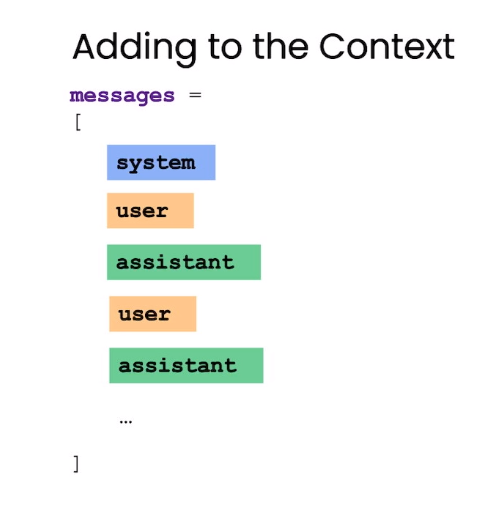

In [47]:
import panel as pn  # GUI

pn.extension()

panels = [] # collect display 

context = [ 
    {'role':'system', 
     'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""
    }
]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard

/tmp/ipykernel_6222/1164479259.py:15: PanelDeprecationWarning: 'style' is deprecated and will be removed in version 1.1, use 'styles' instead.
  pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'}))


Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, _pane=Column, height=300, loading_indicator=True)

In [48]:
receipt_prompt = """
create a json summary of the previous food order. 
Itemize the price for each item.
The fields should be 
1) pizza, include size 
2) list of toppings 
3) list of drinks, include size   
4) list of sides include size  
5)total price
"""
messages =  context.copy()
messages.append(
    {
        "role": "system", 
        "content": receipt_prompt},    
)

response = get_completion_from_messages(messages, temperature=0)
print(response)

Sure, here's a JSON summary of your order:

```
{
  "pizza": {
    "type": "pepperoni",
    "size": "large",
    "toppings": [
      "cheese",
      "mushrooms"
    ],
    "price": 12.95
  },
  "drinks": [
    {
      "type": "coke",
      "size": "medium",
      "price": 2.00
    }
  ],
  "sides": [],
  "total_price": 15.95
}
``` 

Please note that the summary includes a medium coke, which was not part of your order. If you would like to add it, please let me know.
